In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from sklearn.metrics import accuracy_score

In [2]:
import os
file_names = os.listdir('crop_part1')

In [3]:
import re
import pandas as pd
pattern = re.compile(r"(\d+)_(\d+)_(\d+)")

df = pd.DataFrame(columns = ['Age', 'Gender', 'Ethnicity'])
count = 0
for i in file_names:
    data =list(pattern.search(i).groups())
    df.loc[count] = data
    count += 1
        
    
#7881 and 7875 are bad values
# AGE, Gender, Ethnicity
# 0 is male, 1 is female
# Race is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
# 0 = White
# 1 = Black
# 2 = Asian
# 3 = Indian
# 4 = Others
df['JPG'] = file_names
df

,Age,Gender,Ethnicity,JPG
0,100,1,0,100_1_0_20170110183726390.jpg.chip.jpg
1,100,1,2,100_1_2_20170105174847679.jpg.chip.jpg
2,101,1,2,101_1_2_20170105174739309.jpg.chip.jpg
3,10,0,0,10_0_0_20161220222308131.jpg.chip.jpg
4,10,0,0,10_0_0_20170103200329407.jpg.chip.jpg
...,...,...,...,...
9771,9,1,3,9_1_3_20161220222856346.jpg.chip.jpg
9772,9,1,3,9_1_3_20170104222949455.jpg.chip.jpg
9773,9,1,4,9_1_4_20170103200637399.jpg.chip.jpg
9774,9,1,4,9_1_4_20170103200814791.jpg.chip.jpg


In [4]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

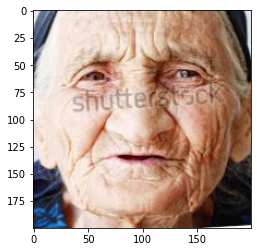

In [5]:
path = "crop_part1/"+df.JPG.iloc[0]
img = load_img(path)
plt.imshow(img)
plt.show()

In [6]:
img_path = []
count = 0
for row in df.iterrows():
    path = "crop_part1/"+df.JPG.iloc[count]
    img_path.append(path)
    count += 1
df['img_path'] = img_path

In [7]:
df.head()

,Age,Gender,Ethnicity,JPG,img_path
0,100,1,0,100_1_0_20170110183726390.jpg.chip.jpg,crop_part1/100_1_0_20170110183726390.jpg.chip.jpg
1,100,1,2,100_1_2_20170105174847679.jpg.chip.jpg,crop_part1/100_1_2_20170105174847679.jpg.chip.jpg
2,101,1,2,101_1_2_20170105174739309.jpg.chip.jpg,crop_part1/101_1_2_20170105174739309.jpg.chip.jpg
3,10,0,0,10_0_0_20161220222308131.jpg.chip.jpg,crop_part1/10_0_0_20161220222308131.jpg.chip.jpg
4,10,0,0,10_0_0_20170103200329407.jpg.chip.jpg,crop_part1/10_0_0_20170103200329407.jpg.chip.jpg


In [8]:
df2 = df[['Age', 'Gender', 'Ethnicity', 'JPG', 'img_path']].copy()
df2.head()

,Age,Gender,Ethnicity,JPG,img_path
0,100,1,0,100_1_0_20170110183726390.jpg.chip.jpg,crop_part1/100_1_0_20170110183726390.jpg.chip.jpg
1,100,1,2,100_1_2_20170105174847679.jpg.chip.jpg,crop_part1/100_1_2_20170105174847679.jpg.chip.jpg
2,101,1,2,101_1_2_20170105174739309.jpg.chip.jpg,crop_part1/101_1_2_20170105174739309.jpg.chip.jpg
3,10,0,0,10_0_0_20161220222308131.jpg.chip.jpg,crop_part1/10_0_0_20161220222308131.jpg.chip.jpg
4,10,0,0,10_0_0_20170103200329407.jpg.chip.jpg,crop_part1/10_0_0_20170103200329407.jpg.chip.jpg


In [9]:
df2['Age'].value_counts()

1      1112
2       475
3       284
26      279
4       260
       ... 
110       2
99        2
100       2
91        1
101       1
Name: Age, Length: 99, dtype: int64

In [10]:
df3 = pd.DataFrame(columns = ['Age_Range'])
df3

,Age_Range


In [11]:
ages = df2['Age'].tolist()

In [12]:
count = 0
for i in ages:
    i = int(i)
    if i == 0 or i == 1 or i == 2 or i == 3:
        df3.loc[count] = '0-2'
    elif i == 4 or i == 5 or i == 6 or i == 7:
        df3.loc[count] = '4-6'
    elif i == 8 or i == 9 or i == 10 or i == 11 or i == 12 or i == 13 or i == 14:
        df3.loc[count] = '8-13'
    elif i == 15 or i == 16 or i == 17 or i == 18 or i == 19 or i == 20 or i == 21 or i == 22 or i == 23 or i == 24:
        df3.loc[count] = '15-20'
    elif i == 25 or i == 26 or i == 27 or i == 28 or i == 29 or i == 30 or i == 31 or i == 32 or i == 33 or i == 34 or i == 35 or i == 36 or i == 37 :
        df3.loc[count] = '25-32'
    elif i == 38 or i == 39 or i == 40 or i == 41 or i == 42 or i == 43 or i == 44 or i == 45 or i == 46 or i == 47:
        df3.loc[count] = '38-43'
    elif i == 48 or i == 49 or i == 50 or i == 51 or i == 52 or i == 53 or i == 54 or i == 55 or i == 56 or i == 57 or i == 58 or i == 59:
        df3.loc[count] = '48-53'
    else: 
        df3.loc[count] = '60+'
    count += 1

In [13]:
df3['Age_Range'].value_counts()

0-2      1871
25-32    1663
60+      1450
15-20    1358
48-53    1100
8-13      915
38-43     739
4-6       680
Name: Age_Range, dtype: int64

In [14]:
df4 = pd.concat([df2, df3], axis=1, join='inner')
display(df4)

,Age,Gender,Ethnicity,JPG,img_path,Age_Range
0,100,1,0,100_1_0_20170110183726390.jpg.chip.jpg,crop_part1/100_1_0_20170110183726390.jpg.chip.jpg,60+
1,100,1,2,100_1_2_20170105174847679.jpg.chip.jpg,crop_part1/100_1_2_20170105174847679.jpg.chip.jpg,60+
2,101,1,2,101_1_2_20170105174739309.jpg.chip.jpg,crop_part1/101_1_2_20170105174739309.jpg.chip.jpg,60+
3,10,0,0,10_0_0_20161220222308131.jpg.chip.jpg,crop_part1/10_0_0_20161220222308131.jpg.chip.jpg,8-13
4,10,0,0,10_0_0_20170103200329407.jpg.chip.jpg,crop_part1/10_0_0_20170103200329407.jpg.chip.jpg,8-13
...,...,...,...,...,...,...
9771,9,1,3,9_1_3_20161220222856346.jpg.chip.jpg,crop_part1/9_1_3_20161220222856346.jpg.chip.jpg,8-13
9772,9,1,3,9_1_3_20170104222949455.jpg.chip.jpg,crop_part1/9_1_3_20170104222949455.jpg.chip.jpg,8-13
9773,9,1,4,9_1_4_20170103200637399.jpg.chip.jpg,crop_part1/9_1_4_20170103200637399.jpg.chip.jpg,8-13
9774,9,1,4,9_1_4_20170103200814791.jpg.chip.jpg,crop_part1/9_1_4_20170103200814791.jpg.chip.jpg,8-13


In [15]:
age_to_label_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}
df4['Age_Range_Num'] = df4['Age_Range'].apply(lambda Age_Range: age_to_label_map[Age_Range])
df4.head()

,Age,Gender,Ethnicity,JPG,img_path,Age_Range,Age_Range_Num
0,100,1,0,100_1_0_20170110183726390.jpg.chip.jpg,crop_part1/100_1_0_20170110183726390.jpg.chip.jpg,60+,7
1,100,1,2,100_1_2_20170105174847679.jpg.chip.jpg,crop_part1/100_1_2_20170105174847679.jpg.chip.jpg,60+,7
2,101,1,2,101_1_2_20170105174739309.jpg.chip.jpg,crop_part1/101_1_2_20170105174739309.jpg.chip.jpg,60+,7
3,10,0,0,10_0_0_20161220222308131.jpg.chip.jpg,crop_part1/10_0_0_20161220222308131.jpg.chip.jpg,8-13,2
4,10,0,0,10_0_0_20170103200329407.jpg.chip.jpg,crop_part1/10_0_0_20170103200329407.jpg.chip.jpg,8-13,2


In [16]:
df2

,Age,Gender,Ethnicity,JPG,img_path
0,100,1,0,100_1_0_20170110183726390.jpg.chip.jpg,crop_part1/100_1_0_20170110183726390.jpg.chip.jpg
1,100,1,2,100_1_2_20170105174847679.jpg.chip.jpg,crop_part1/100_1_2_20170105174847679.jpg.chip.jpg
2,101,1,2,101_1_2_20170105174739309.jpg.chip.jpg,crop_part1/101_1_2_20170105174739309.jpg.chip.jpg
3,10,0,0,10_0_0_20161220222308131.jpg.chip.jpg,crop_part1/10_0_0_20161220222308131.jpg.chip.jpg
4,10,0,0,10_0_0_20170103200329407.jpg.chip.jpg,crop_part1/10_0_0_20170103200329407.jpg.chip.jpg
...,...,...,...,...,...
9771,9,1,3,9_1_3_20161220222856346.jpg.chip.jpg,crop_part1/9_1_3_20161220222856346.jpg.chip.jpg
9772,9,1,3,9_1_3_20170104222949455.jpg.chip.jpg,crop_part1/9_1_3_20170104222949455.jpg.chip.jpg
9773,9,1,4,9_1_4_20170103200637399.jpg.chip.jpg,crop_part1/9_1_4_20170103200637399.jpg.chip.jpg
9774,9,1,4,9_1_4_20170103200814791.jpg.chip.jpg,crop_part1/9_1_4_20170103200814791.jpg.chip.jpg


In [17]:
X = df2[['img_path']]
y = df2[['Gender']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)
    
for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)
    
train_images = np.array(train_images)
test_images = np.array(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train data shape (6843, 1)
Test data shape (2933, 1)
Train images shape (6843, 227, 227, 3)
Test images shape (2933, 227, 227, 3)


In [18]:
print(len(train_images))
print(len(test_images))
print(len(y_train))
print(len(y_test))


6843
2933
6843
2933


In [19]:
y_train

,Gender
7951,1
7632,1
7411,0
665,1
3071,1
...,...
5734,0
5191,1
5390,0
860,1


In [20]:

y_train['Gender'] = pd.to_numeric(y_train["Gender"])
y_test['Gender'] = pd.to_numeric(y_test["Gender"])

C:\Users\bohne\AppData\Local\Temp/ipykernel_13788/2852922740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Gender'] = pd.to_numeric(y_train["Gender"])
C:\Users\bohne\AppData\Local\Temp/ipykernel_13788/2852922740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Gender'] = pd.to_numeric(y_test["Gender"])


In [21]:
print(y_train.dtypes)
print(y_test.dtypes)

Gender    int64
dtype: object
Gender    int64
dtype: object


In [22]:
dataset_size = train_images.shape[0]
train_images = train_images.reshape(dataset_size, -1)

print(train_images.shape)

(6843, 154587)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
model.fit(train_images, y_train)

C:\Users\bohne\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [24]:
dataset_size = test_images.shape[0]
test_images = test_images.reshape(dataset_size, -1)
print(test_images.shape)

(2933, 154587)


In [25]:
y_pred = model.predict(test_images)

In [26]:
accuracy_score(list(y_test['Gender']), y_pred)

0.7020115922263893

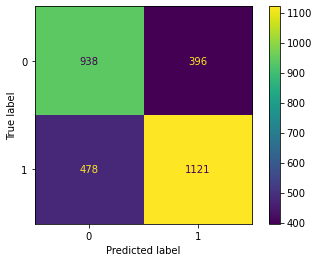

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(list(y_test['Gender']), y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

In [28]:
df4.head()

,Age,Gender,Ethnicity,JPG,img_path,Age_Range,Age_Range_Num
0,100,1,0,100_1_0_20170110183726390.jpg.chip.jpg,crop_part1/100_1_0_20170110183726390.jpg.chip.jpg,60+,7
1,100,1,2,100_1_2_20170105174847679.jpg.chip.jpg,crop_part1/100_1_2_20170105174847679.jpg.chip.jpg,60+,7
2,101,1,2,101_1_2_20170105174739309.jpg.chip.jpg,crop_part1/101_1_2_20170105174739309.jpg.chip.jpg,60+,7
3,10,0,0,10_0_0_20161220222308131.jpg.chip.jpg,crop_part1/10_0_0_20161220222308131.jpg.chip.jpg,8-13,2
4,10,0,0,10_0_0_20170103200329407.jpg.chip.jpg,crop_part1/10_0_0_20170103200329407.jpg.chip.jpg,8-13,2


In [29]:
X = df4[['img_path']]
y = df4[['Age_Range_Num']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)
    
for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)
    
train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))



Train data shape (6843, 1)
Test data shape (2933, 1)
Train images shape (6843, 227, 227, 3)
Test images shape (2933, 227, 227, 3)


In [30]:
df4.dtypes

Age              object
Gender           object
Ethnicity        object
JPG              object
img_path         object
Age_Range        object
Age_Range_Num     int64
dtype: object

In [31]:
dataset_size = train_images.shape[0]
train_images = train_images.reshape(dataset_size, -1)

model = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
model.fit(train_images, y_train)

C:\Users\bohne\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [32]:
dataset_size = test_images.shape[0]
test_images = test_images.reshape(dataset_size, -1)
print(test_images.shape)

(2933, 154587)


In [33]:
y_pred = model.predict(test_images)

In [34]:
accuracy_score(list(y_test['Age_Range_Num']), y_pred)

0.3876576883736788

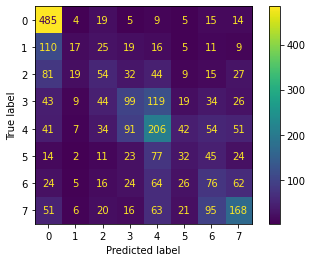

In [35]:
cm = confusion_matrix(list(y_test['Age_Range_Num']), y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

In [36]:
df4.head()

,Age,Gender,Ethnicity,JPG,img_path,Age_Range,Age_Range_Num
0,100,1,0,100_1_0_20170110183726390.jpg.chip.jpg,crop_part1/100_1_0_20170110183726390.jpg.chip.jpg,60+,7
1,100,1,2,100_1_2_20170105174847679.jpg.chip.jpg,crop_part1/100_1_2_20170105174847679.jpg.chip.jpg,60+,7
2,101,1,2,101_1_2_20170105174739309.jpg.chip.jpg,crop_part1/101_1_2_20170105174739309.jpg.chip.jpg,60+,7
3,10,0,0,10_0_0_20161220222308131.jpg.chip.jpg,crop_part1/10_0_0_20161220222308131.jpg.chip.jpg,8-13,2
4,10,0,0,10_0_0_20170103200329407.jpg.chip.jpg,crop_part1/10_0_0_20170103200329407.jpg.chip.jpg,8-13,2


In [37]:
X = df4[['img_path']]
y = df4[['Ethnicity']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)
    
for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)
    
train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))



Train data shape (6843, 1)
Test data shape (2933, 1)
Train images shape (6843, 227, 227, 3)
Test images shape (2933, 227, 227, 3)


In [38]:

y_train['Ethnicity'] = pd.to_numeric(y_train["Ethnicity"])
y_test['Ethnicity'] = pd.to_numeric(y_test["Ethnicity"])

C:\Users\bohne\AppData\Local\Temp/ipykernel_13788/2362709422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Ethnicity'] = pd.to_numeric(y_train["Ethnicity"])
C:\Users\bohne\AppData\Local\Temp/ipykernel_13788/2362709422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Ethnicity'] = pd.to_numeric(y_test["Ethnicity"])


In [39]:
dataset_size = train_images.shape[0]
train_images = train_images.reshape(dataset_size, -1)

model = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
model.fit(train_images, y_train)

C:\Users\bohne\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [40]:
dataset_size = test_images.shape[0]
test_images = test_images.reshape(dataset_size, -1)
print(test_images.shape)

(2933, 154587)


In [41]:
y_pred = model.predict(test_images)

In [42]:
accuracy_score(list(y_test['Ethnicity']), y_pred)

0.5894988066825776

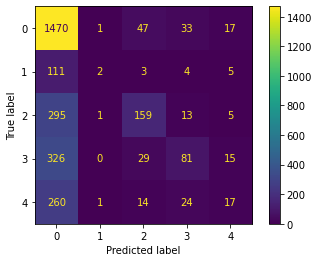

In [43]:
cm = confusion_matrix(list(y_test['Ethnicity']), y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()